In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_rows", 300)  #表示する行数を増やす

In [3]:
#明智は人名、大湫はツイートなし、日吉は京都にも同じ地名あり、山岡は人名ラーメン屋、釜戸はご飯、明世はツイートなし、土岐は人名、陶は人名器
city_list = ['ena', 'nakatsugawa', 'tajimi', 'mizunami', 'iwamura', 'kushihara', 'ueyahagi', 'daishu', 'inetsu', # 分析可能
             'meiyo', 'hiyoshi', 'kamako', 'tou', 'yamaoka', 'toki', 'akechi'] #分析困難
city = city_list[0]
period = '2018-06-30'
infile = "tweets_in_a_week/"+city+period+".csv"
outfile = "tweets_in_a_week/"+city+period+".png"

In [4]:
datas = pd.read_csv(open(infile, 'rU'), encoding='utf-8')

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [5]:
datas

,Unnamed: 0,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text
0,0,Fri Jul 06 23:56:00 +0000 2018,saacha28,さとちゃ@VAPER,ドールかわいい。リア充でヲタ充/アニメ、ゲーム、ニコ動好き/冬は痛板で雪山/最遊記/乙女ゲ/...,397,288,7293,VAPE shop,6,お出掛けハーンチェ(*´ω`*)恵那行ってから飯田行きます(｀･ω･´)\n#VAPE ht...
1,1,Fri Jul 06 23:39:23 +0000 2018,nananoko_bot,nananoko_bot,なな乃の企画っ子botです。1時間に1回、ランダムに呟きます。不定期で更新。※只今試験運転中,4,9,32570,NaN,0,【恵那】アァッ！？アンタが先に吹っ掛けて来たんだろ！！私はぶつかった事は謝った！なのに何なん...
2,2,Fri Jul 06 23:27:02 +0000 2018,jr313_8000bot,313系8000番台bot,313系8000番台のbotだよ〜主に中央西線のことをツイートします〜30分ごとにツイートし...,358,363,194520,神領車両区,0,この列車はホームライナー中津川1号\n中津川行きです。途中の停車駅は金山、鶴舞、千種、大曽根...
3,3,Fri Jul 06 23:24:37 +0000 2018,r_21_gifu,岐阜県交通情報(非公式),岐阜県の道路交通情報(主に通行止め)を非公式に流していきます,1,333,45664,NaN,0,※解除※\n恵那御嵩線(６５号線) 下り 区間：瑞浪市釜戸町－瑞浪市大湫町\n大雨のため通行...
4,4,Fri Jul 06 23:24:35 +0000 2018,r_21_gifu,岐阜県交通情報(非公式),岐阜県の道路交通情報(主に通行止め)を非公式に流していきます,1,333,45664,NaN,0,※解除※\n恵那御嵩線(６５号線) 上り 区間：瑞浪市大湫町－瑞浪市釜戸町\n大雨のため通行...
5,5,Fri Jul 06 23:24:01 +0000 2018,hahahaking758,ハハハking,人生ラジオと共に…。CBC、ZIPFM、LF、QR&TFM\n\n\nドラゴンズファンですが...,46,67,1327,愛西市って知ってる？,2,"今朝のZIPFMのcasual,usualで\nアズ姉が恵那 博石館の\n七夕イベント紹介し..."
6,6,Fri Jul 06 23:22:47 +0000 2018,ChisakiHiromi,chisaki hiromi,photographer・mydaydream⋆sleeping princess ○ 1枚...,44,25,109,大阪,0,@hodachrome2 めっちゃ素敵な作品ーー💕💕恵那って行ったことないけど一度行ってみた...
7,7,Fri Jul 06 23:11:48 +0000 2018,komeda_bot,コメダ珈琲bot,コメダ珈琲店非公式botです。 \n気まぐれフォローします。\n\n今日のこめだったーhtt...,1837,1424,59425,コメダ珈琲店内,0,岐阜県コメダ珈琲恵那長島店でも8時11分やで。 #jikoku #bot #非公式 #kom...
8,8,Fri Jul 06 23:09:49 +0000 2018,EMARBl7WrFSfGl6,岐阜の日本一bot,岐阜県が誇る日本一を紹介します。追加等もしあれば、DMでお願いします。,1035,167,6945,NaN,0,恵那市岩村町富田地区は、１９８９年国土問題研究会より『農村景観日本一』になりました。富田地区...
9,9,Fri Jul 06 22:57:48 +0000 2018,meieki_bot,名古屋駅bot,毎日人並みが絶えない名古屋駅(JR、名鉄、近鉄)、金山駅、名古屋市交通局のbotです。このア...,40,148,53934,愛知県名古屋市中村区名駅,0,快速|中津川\n停車駅\n名古屋、金山、鶴舞、千種、大曽根、勝川、春日井、高蔵寺、多治見、土...


# botとか不適切やツイートを除く

In [6]:
datas = datas.drop('Unnamed: 0', axis=1)

In [7]:
improper_col = []
for col in range(datas.shape[0]):
#    if type(datas.name[col]) != str or type(datas.profile[col]) != str or type(datas.text[col]) != str:
    if type(datas.text[col]) != str:
        print('-'*40)
        print(col)
        print(type(datas.name[col]), type(datas.profile[col]), type(datas.text[col]),)
        print(datas.iloc[col])
        improper_col.append(col)
datas = datas.drop(improper_col, axis=0)
datas = datas.reset_index(drop=True)

In [8]:
improper_names  = ['bot', 'Bot', 'BOT', 'ぼっと', '情報', '案内', '相互', '出会', 'セフレ', 'エッチ', '法人',
                   '宮部雪宗', '多治見ネオ',
                   'フィギュア', '空き家オールバンク', 'つけめん 恵那く', 'すぎたけ', '東城咲耶子'#for ena
                   '石田麦', '創作さん', '恵那(癒し力高め中)', 'どう美じゅ合同誌', 'よつばと'] #for ena
improper_profiles  = ['improper_words', 'bot', 'Bot', 'BOT', 'ぼっと',
                      'えなfam', 'ｶﾞﾁだん', 'ガチだん', 'Καρδιά μου', '月がきれい', '成人済み腐女子', #for ena
                      'リトルアーモリー', 'アクティブなインドア派声優'] #for ena
improper_texts  = ['improper_words', "I'm at", '相互',
                   '岩村明憲', '岩村努', '岩村愛', #for iwamura
                   "稲津けんご", #for inatsu
                   '斉藤恵那', '恵那さん', '恵那ちゃん', 'リトルアーモリー', 'よつばと'] #for ena

for col in range(datas.shape[0]):
    for word in improper_names:
        if word in datas['name'][col]:
            datas['profile'][col] = 'improper_words'
            break
    if type(datas['profile'][col]) == str:
        for word in improper_profiles:
            if word in datas['profile'][col]:
                datas['text'][col] = 'improper_words'
                break
    for word in improper_texts:
        if word in datas['text'][col]:
            datas = datas.drop(col, axis=0)
            break

datas = datas.reset_index(drop=True)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
datas

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text
0,Fri Jul 06 23:56:00 +0000 2018,saacha28,さとちゃ@VAPER,ドールかわいい。リア充でヲタ充/アニメ、ゲーム、ニコ動好き/冬は痛板で雪山/最遊記/乙女ゲ/...,397,288,7293,VAPE shop,6,お出掛けハーンチェ(*´ω`*)恵那行ってから飯田行きます(｀･ω･´)\n#VAPE ht...
1,Fri Jul 06 23:24:01 +0000 2018,hahahaking758,ハハハking,人生ラジオと共に…。CBC、ZIPFM、LF、QR&TFM\n\n\nドラゴンズファンですが...,46,67,1327,愛西市って知ってる？,2,"今朝のZIPFMのcasual,usualで\nアズ姉が恵那 博石館の\n七夕イベント紹介し..."
2,Fri Jul 06 23:22:47 +0000 2018,ChisakiHiromi,chisaki hiromi,photographer・mydaydream⋆sleeping princess ○ 1枚...,44,25,109,大阪,0,@hodachrome2 めっちゃ素敵な作品ーー💕💕恵那って行ったことないけど一度行ってみた...
3,Fri Jul 06 22:41:11 +0000 2018,zenchanfarm,岩村観光｜ブルーベリー狩り｜ぜんちゃんふぁーむ｜岐阜県恵那市岩村町,岐阜県恵那市岩村町富田、農村景観日本一にある、ぜんちゃんふぁーむ観光農園。葡萄、ブルーベリー...,1559,2451,2650,岐阜県恵那市岩村町富田大円寺,14,岐阜県恵那市岩村町、ぜんちゃんふぁーむです♪\n今現在、雨は降っていません。ブルーベリー狩り...
4,Fri Jul 06 22:33:04 +0000 2018,moto_matsu,松田基教,2017年8月から岐阜県多治見市にあるキリスト教会の牧師をしています。2005年から2017...,481,1245,14878,岐阜県多治見市,3,今日は岐阜県恵那市にある雀のお宿キリスト教会館のワークデイに家族で参加する予定でしたが、今の...
5,Fri Jul 06 21:59:04 +0000 2018,koronesi2,ころねし@クソザコ,のじゃロリ巫女服狐娘と初音ミクが命のおじさん(24歳)／ジムニー(ランドベンチャー)/ディズ...,1295,659,108162,イントゥースペース,0,ﾄﾞﾗｺｺ! 岐阜県恵那市武並町 [ドラココなう！iPhone] #doracoconow
6,Fri Jul 06 21:52:22 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,0,寝坊してしまったので吉野家はなし！🍞と🍙を😶 疲れてるなぁ (@ ローソン 恵那市役所前店 ...
7,Fri Jul 06 21:47:28 +0000 2018,ese_no_zaregoto,杉並区の勝俣,左耳難聴。年齢不詳。杉並区民。無病息災。奇想天外。神出鬼没。疑心暗鬼。優柔不断。,260,204,52515,そここここそ,0,ポークキーマ(保美豚)+チキンと茄子の南インド風カリー(恵那鶏/茄子：八ツ平高原)+オクラの...
8,Fri Jul 06 21:33:51 +0000 2018,metalnokan,めたるんおかん,メタルを愛し、耳にピアス、メタルTで仕事するアラフィフかーちゃんdeath lml 愛車はジ...,33,19,174,NaN,2,まだ駒ヶ根ー松川 通行止かー\n\n飯田から乗るか\n\nでもなんか恵那ら辺事故らしいし。。。
9,Fri Jul 06 18:41:46 +0000 2018,rupinasu0937,ルピ茄子,北海道大好き岐阜県人,80,48,860,NaN,3,岐阜県内あちこちで土砂崩れが発生しておりますが、こちら恵那市南部は特に異常ありません。


# キーワードを多くツイートした人

In [10]:
n_keyword_tweets = datas['id'].value_counts()
n_keyword_tweets_arr = []

for col in range(datas.shape[0]):
    n_keyword_tweets_arr.append(n_keyword_tweets[datas['id'][col]])
datas['n_keyword_tweets'] = n_keyword_tweets_arr

del n_keyword_tweets, n_keyword_tweets_arr

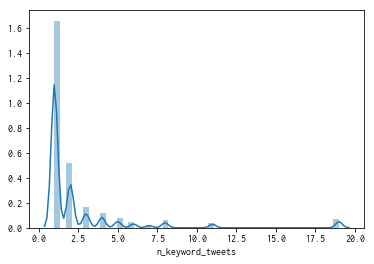

In [11]:
sns.distplot(datas['n_keyword_tweets'])

In [12]:
datas.sort_values('n_keyword_tweets', ascending=False)[:100]

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
705,Sun Jul 01 00:01:28 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,0,書類をポトン*˙︶˙*)ﾉ📮 多分、記入不備で帰ってきそう⁉️ (@ 恵那郵便局 in 恵那...,19
592,Sun Jul 01 09:46:17 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,1,夏バテに大人のスパイシー夏野菜カレー(*´ ³ `)ﾉ🍛 ハンバーグぷらす (@ CoCo壱...,19
541,Sun Jul 01 21:48:37 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,0,"カップが夏になった🌞*˙︶˙*)ﾉ☕ (@ ローソン 恵那市役所前店 in 恵那市, 岐阜県...",19
129,Thu Jul 05 21:29:45 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,0,しおさぁーばー*˙︶˙*)ﾉ🍚 皆さま🌧️の影響大丈夫ですか？こちらは小雨です🌂 (@ 吉野...,19
477,Mon Jul 02 21:38:39 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,0,あぢぃ〰️🌞*˙︶˙*)ﾉ愛す☕でクールダウン (@ ローソン 恵那市役所前店 in 恵那市...,19
478,Mon Jul 02 21:27:39 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,0,塩鯖*˙︶˙*)ﾉ🐟🍚 (@ 吉野家 19号線恵那店 - @yoshinoyagyudon ...,19
655,Sun Jul 01 04:24:46 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,0,"天おろしそば(冷)*˙︶˙*)ﾉ 暑い🌞ので (@ そば茶屋恵那峡店 in 恵那市, 岐阜県...",19
695,Sun Jul 01 00:42:10 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,0,マンゴーパッションでクールダウン*˙︶˙*)ﾉ🍹 (@ Starbucks Coffee ...,19
435,Tue Jul 03 10:16:29 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,0,かりんと饅頭がない(&gt;_&lt;)ガッカリ😖 (@ セブンイレブン 恵那バイパス店 -...,19
697,Sun Jul 01 00:37:46 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,1,"まだまだ人気継続中…… (@ 恵那峡SA (下り) in 恵那市, 岐阜県) https:/...",19


# フォロワー数とか

In [13]:
datas_unique = datas.drop_duplicates(subset='id')
datas_unique = datas_unique.reset_index(drop=True)
datas_unique

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
0,Fri Jul 06 23:56:00 +0000 2018,saacha28,さとちゃ@VAPER,ドールかわいい。リア充でヲタ充/アニメ、ゲーム、ニコ動好き/冬は痛板で雪山/最遊記/乙女ゲ/...,397,288,7293,VAPE shop,6,お出掛けハーンチェ(*´ω`*)恵那行ってから飯田行きます(｀･ω･´)\n#VAPE ht...,1
1,Fri Jul 06 23:24:01 +0000 2018,hahahaking758,ハハハking,人生ラジオと共に…。CBC、ZIPFM、LF、QR&TFM\n\n\nドラゴンズファンですが...,46,67,1327,愛西市って知ってる？,2,"今朝のZIPFMのcasual,usualで\nアズ姉が恵那 博石館の\n七夕イベント紹介し...",1
2,Fri Jul 06 23:22:47 +0000 2018,ChisakiHiromi,chisaki hiromi,photographer・mydaydream⋆sleeping princess ○ 1枚...,44,25,109,大阪,0,@hodachrome2 めっちゃ素敵な作品ーー💕💕恵那って行ったことないけど一度行ってみた...,1
3,Fri Jul 06 22:41:11 +0000 2018,zenchanfarm,岩村観光｜ブルーベリー狩り｜ぜんちゃんふぁーむ｜岐阜県恵那市岩村町,岐阜県恵那市岩村町富田、農村景観日本一にある、ぜんちゃんふぁーむ観光農園。葡萄、ブルーベリー...,1559,2451,2650,岐阜県恵那市岩村町富田大円寺,14,岐阜県恵那市岩村町、ぜんちゃんふぁーむです♪\n今現在、雨は降っていません。ブルーベリー狩り...,7
4,Fri Jul 06 22:33:04 +0000 2018,moto_matsu,松田基教,2017年8月から岐阜県多治見市にあるキリスト教会の牧師をしています。2005年から2017...,481,1245,14878,岐阜県多治見市,3,今日は岐阜県恵那市にある雀のお宿キリスト教会館のワークデイに家族で参加する予定でしたが、今の...,1
5,Fri Jul 06 21:59:04 +0000 2018,koronesi2,ころねし@クソザコ,のじゃロリ巫女服狐娘と初音ミクが命のおじさん(24歳)／ジムニー(ランドベンチャー)/ディズ...,1295,659,108162,イントゥースペース,0,ﾄﾞﾗｺｺ! 岐阜県恵那市武並町 [ドラココなう！iPhone] #doracoconow,1
6,Fri Jul 06 21:52:22 +0000 2018,vampiremore,kazuuun,映画、温泉、ドライブ、旅行など、良き仲間と遊んでいます。Nikon D7200📸(*^^*)...,203,293,7908,gifuken,0,寝坊してしまったので吉野家はなし！🍞と🍙を😶 疲れてるなぁ (@ ローソン 恵那市役所前店 ...,19
7,Fri Jul 06 21:47:28 +0000 2018,ese_no_zaregoto,杉並区の勝俣,左耳難聴。年齢不詳。杉並区民。無病息災。奇想天外。神出鬼没。疑心暗鬼。優柔不断。,260,204,52515,そここここそ,0,ポークキーマ(保美豚)+チキンと茄子の南インド風カリー(恵那鶏/茄子：八ツ平高原)+オクラの...,1
8,Fri Jul 06 21:33:51 +0000 2018,metalnokan,めたるんおかん,メタルを愛し、耳にピアス、メタルTで仕事するアラフィフかーちゃんdeath lml 愛車はジ...,33,19,174,NaN,2,まだ駒ヶ根ー松川 通行止かー\n\n飯田から乗るか\n\nでもなんか恵那ら辺事故らしいし。。。,1
9,Fri Jul 06 18:41:46 +0000 2018,rupinasu0937,ルピ茄子,北海道大好き岐阜県人,80,48,860,NaN,3,岐阜県内あちこちで土砂崩れが発生しておりますが、こちら恵那市南部は特に異常ありません。,1


In [14]:
datas_unique.describe()

,n_following,n_followed,n_tweets,n_favorited,n_keyword_tweets
count,547.000000,5.470000e+02,5.470000e+02,547.000000,547.000000
mean,735.800731,5.784232e+03,3.605778e+04,3.303473,1.360146
std,1917.484559,1.097400e+05,8.948556e+04,11.025912,1.212006
min,0.000000,0.000000e+00,1.000000e+00,0.000000,1.000000
25%,111.000000,1.230000e+02,2.080000e+03,0.000000,1.000000
50%,278.000000,3.010000e+02,8.280000e+03,0.000000,1.000000
75%,648.500000,7.450000e+02,3.452450e+04,2.000000,1.000000
max,27991.000000,2.566690e+06,1.495693e+06,146.000000,19.000000


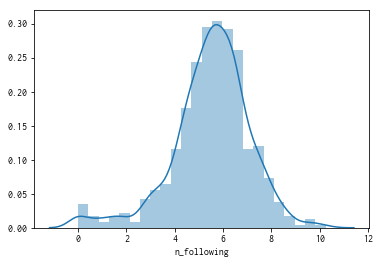

In [15]:
sns.distplot(np.log1p(datas_unique['n_following']))

In [16]:
datas_unique.sort_values(by='n_following', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
423,Sun Jul 01 18:37:39 +0000 2018,hoteldaiyokujyo,hoteldaiyokujyo,大浴場のあるビジネスホテル・シティホテルを自治体ごとに網羅。写真と宿泊料金から選べます。フォ...,27991,28348,219715,NaN,0,【岐阜県恵那市 大浴場のあるビジネスホテル・シティホテル】\n恵那駅からなんとか？歩ける場所...,1
74,Fri Jul 06 06:13:29 +0000 2018,Transcend_Japan,トランセンドジャパン㍿,メモリやストレージ製品を製造、販売しているトランセンドの日本法人「トランセンドジャパン」の公...,17732,37473,42288,東京都台東区蔵前,1,@Kamui_Nyan 岐阜県は恵那市のヤバいTシャツ屋…じゃなかった、印刷会社様ですよ～！,1
118,Thu Jul 05 18:48:28 +0000 2018,otoriyosejapan,日本全国おとりよせ,日本全国から、気になる商品をお取り寄せ。,16995,16890,88944,NaN,0,【岐阜県恵那市】 あのJR東海が「本気」で直営の地域産品通販サイトを立ち上げていた！鉄板の贈...,2
98,Fri Jul 06 00:07:00 +0000 2018,DIGITA_print,印刷通販デジタ【公式】,高品質＆低価格のネット印刷デジタ公式アカウントです。ステッカーやパッケージ、Tシャツなど、豊...,13096,18810,6975,岐阜県恵那市,3,@CASIOJapan 恵那市！！！,3
85,Fri Jul 06 03:12:38 +0000 2018,gifupr,岐阜県を勝手にＰＲ,まちおこし・観光・不動産の通信社 遊都総研が岐阜県の観光・物産を勝手にＰＲします。 みなさん...,11355,10360,96026,NaN,1,【岐阜県恵那市】 女城主は直虎だけじゃなかった？美濃の女城主が居た岩村城の麓に建つ「岩村山荘...,8
351,Tue Jul 03 10:36:54 +0000 2018,takahikomiwa,津川孝彦,今年６６歳になった無職のジイサンです。年金生活者です。岐阜県中津川市坂下に３反の畑と庭に続く...,6620,6577,45698,愛知県春日井市 岐阜県中津川市,1,【徳川将軍家御膳米が当たる！】NHK連続テレビ小説『半分、青い。』で盛り上がる岐阜県観光トピ...,1
208,Thu Jul 05 07:13:36 +0000 2018,tabibito_hakuto,日本のいいとこ。,たくさんの方にバイクを通して日本の素晴らしさを伝えたい！☺️✨日本の面白い所、日本の四季折々...,5990,7493,1524,🔽バイクで旅をしたいあなたへ送るツーリングメルマガ,39,岐阜県恵那市\n\n「恵那峡」\n\n恵那峡は、自然と人工の融合した観光地。\n\n木曽川中...,1
187,Thu Jul 05 10:17:41 +0000 2018,takenakasports,野球専門店 竹中スポーツ 岐阜【公式】,創業50年以上！【野球に詳しくなれて上達するお店】野球専門店 信頼の竹中スポーツです！様々な...,5988,7272,2764,岐阜 岐阜市,114,高校野球2018\n夏の甲子園へ❗️\nチーム紹介【8】【9】\n\n帝京大可児\n飛騨神岡...,1
93,Fri Jul 06 00:54:42 +0000 2018,kwumiss18_2,中谷彩伽(なかやん)【ミス共立女子】,❥ミス共立女子〜桜姫〜コンテスト出場中【エントリーNo.2】 なかや あやかです🌷 ⚠️8月...,5730,5314,4252,↓投票8/1～スタート！共立祭10/20(土)・21(日)♡,1,@b4_d30_yuuki 神奈川生まれだよ🤗\n今は東京💪🏼\n岐阜県は恵那市に行ったこと...,1
115,Thu Jul 05 21:13:08 +0000 2018,CtvTub53,おびちゃん〜信州松本の旅人〜,長野県松本市出身の男子大学生/チューバ吹き/KAWAI EBB-981L/信州の観光PR＆案...,4886,3472,37955,長野県松本市 《信州・岐阜・奈良が好き 》,2,中津川や恵那も勧告出てるのか,1


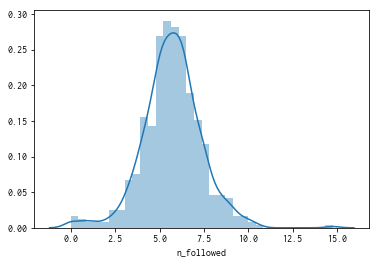

In [17]:
sns.distplot(np.log1p(datas_unique['n_followed']))

In [18]:
datas_unique.sort_values(by='n_followed', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
147,Thu Jul 05 14:05:54 +0000 2018,nhk_news,NHKニュース,NHKニュースの公式アカウントです。最新のニュースを24時間休みなくお届けします。 http...,18,2566690,347161,東京都渋谷区神南2-2-1,22,岐阜 恵那市の一部に避難勧告 #nhk_news https://t.co/jWYqorkCO2,1
74,Fri Jul 06 06:13:29 +0000 2018,Transcend_Japan,トランセンドジャパン㍿,メモリやストレージ製品を製造、販売しているトランセンドの日本法人「トランセンドジャパン」の公...,17732,37473,42288,東京都台東区蔵前,1,@Kamui_Nyan 岐阜県は恵那市のヤバいTシャツ屋…じゃなかった、印刷会社様ですよ～！,1
423,Sun Jul 01 18:37:39 +0000 2018,hoteldaiyokujyo,hoteldaiyokujyo,大浴場のあるビジネスホテル・シティホテルを自治体ごとに網羅。写真と宿泊料金から選べます。フォ...,27991,28348,219715,NaN,0,【岐阜県恵那市 大浴場のあるビジネスホテル・シティホテル】\n恵那駅からなんとか？歩ける場所...,1
195,Thu Jul 05 09:32:37 +0000 2018,CASIOJapan,CASIO カシオ計算機株式会社,カシオ計算機の公式Twitterです。新製品情報やその他の色々な情報を、スタッフ2名がつぶや...,503,25530,30397,日本,2,@DIGITA_print 恵那...市...？？,1
419,Mon Jul 02 00:49:52 +0000 2018,JP_DiNOMEN,DiNOMEN［公式］企業公式中の人総選挙2018投票CP中,株式会社桃山ホールディングスのメンズケアブランドDiNOMEN公式アカウントです。お洒落で格...,1548,20690,8602,愛知県春日井市,6,(●´ϖ`●).。0（昨日、ドライブ中にたまたま見つけた恵那のブルーベリーの丘ホピさん@ho...,1
98,Fri Jul 06 00:07:00 +0000 2018,DIGITA_print,印刷通販デジタ【公式】,高品質＆低価格のネット印刷デジタ公式アカウントです。ステッカーやパッケージ、Tシャツなど、豊...,13096,18810,6975,岐阜県恵那市,3,@CASIOJapan 恵那市！！！,3
118,Thu Jul 05 18:48:28 +0000 2018,otoriyosejapan,日本全国おとりよせ,日本全国から、気になる商品をお取り寄せ。,16995,16890,88944,NaN,0,【岐阜県恵那市】 あのJR東海が「本気」で直営の地域産品通販サイトを立ち上げていた！鉄板の贈...,2
143,Thu Jul 05 14:08:51 +0000 2018,NS_keitai,NHKグローバルメディアサービス,モバイルニュースサイト「NHKニュース&スポーツ」の公式アカウントです。ＮＨＫがお伝えする最...,953,15767,211691,東京都渋谷区神山町9-2,1,【最新ニュース】岐阜県恵那市は大雨で土砂災害の危険性が高まっているとして、午後９時45分に中...,1
458,Sun Jul 01 09:36:25 +0000 2018,asadra_NHK,朝ドラ「半分、青い。」の話題配信,NHK 朝の連続テレビ小説 #半分青い #わろてんか に関連する話題（ニュース/感想/ あら...,5,13212,15659,NaN,16,「半分、青い。」ロケ地、岩村散策マップで紹介 観光案内所で配布 恵那市 ／岐阜 - 毎日新聞...,2
202,Thu Jul 05 08:45:00 +0000 2018,yogoren,よごれん,ＴＥＡＭ酷道 管理人／岐阜県民／書籍「日本の秘境」｢日本の地下世界｣「廃線探訪」等の著者 鹿...,697,10650,33708,NaN,11,こちらは恵那市災害対策本部です。\n大雨警報にともない夜から明け方にかけて被害の発生の恐れが...,1


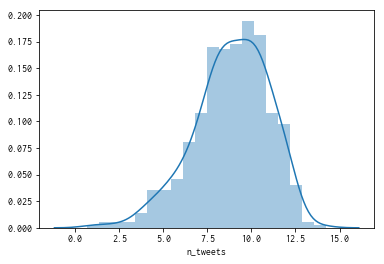

In [19]:
sns.distplot(np.log1p(datas_unique['n_tweets']))

In [20]:
datas_unique.sort_values(by='n_tweets', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
216,Thu Jul 05 05:02:03 +0000 2018,A_Zbookstore,A-Z bookstore,ネットショップのおすすめ商品をご紹介しております。姉妹サイト 地域ナビショップの商品も並行し...,2,728,1495693,NaN,0,和菓子 ギフト 「栗きんとん焼菓子 恵那っ子15入」恵那栗工房良平堂 【あす楽対応】 (店舗...,2
109,Thu Jul 05 21:53:06 +0000 2018,Nakono731,なこのちゃん,西三河をお散歩してる人形者らいだーで社畜。 たまに車載動画撮ったりお絵かきしてたりします。R...,1492,2994,667426,Aichi Japan,0,恵那はトンネルだらけのイメージ。だいたい恵那市の8割がトンネルで、住民はトンネルの中で暮らし...,2
401,Mon Jul 02 11:16:39 +0000 2018,kir1ca,キリカ,英国育ち東京在住のデザイナー。好きなものは愛車のロータス・エリーゼとガジェットと写真とラルク...,1228,9267,514311,Hotel Moonside,0,@suga_genmai 小宮恵那！？,3
110,Thu Jul 05 21:48:50 +0000 2018,motoxmoto,能登もと&モク=モト@2日目西け39b,新井素子とかSFとか創作小説同人とか旅行とか道辿ったりとかビアンキとか。 ドールもお迎えしま...,539,631,385166,大阪市あさひく,0,恵那ってええなあ,1
147,Thu Jul 05 14:05:54 +0000 2018,nhk_news,NHKニュース,NHKニュースの公式アカウントです。最新のニュースを24時間休みなくお届けします。 http...,18,2566690,347161,東京都渋谷区神南2-2-1,22,岐阜 恵那市の一部に避難勧告 #nhk_news https://t.co/jWYqorkCO2,1
55,Fri Jul 06 10:29:52 +0000 2018,rpdexp,かいきゅん,かいきゅん/ようじょ/8 歳/DDR：SP大足神(STR195)DP(STR178)/Spl...,1046,1913,293166,DDR-CODE: 3104-8974/5146-7487,2,あ，恵那くのつけ麺たべたい,1
492,Sun Jul 01 04:41:14 +0000 2018,Chihaya_HakuSRE,💍🌸伊奈友希(いな ゆき)🌸💍,みのりさん…はぁ……。2月にプロポーズされた私は、3月の小倉で花束持ってお祭りしてエスコート...,3468,2614,262192,ゆきの魂は幕張と小倉と静岡、そして名古屋の空に,2,"きょうのあたい (@ 恵那駅 in 恵那市, 岐阜県) https://t.co/UUPRF...",1
57,Fri Jul 06 10:20:06 +0000 2018,kajiminn,かじみん、＠免停開け,七森中☆情報処理部→うさぎ山高校吹奏楽部→日吉町プロペラーズ団員→ルーナノヴァ魔法学校用務員...,1484,1432,257162,牡蠣野ヶ丘高校,0,小宮恵那千曲川に流されて新潟に行け,2
145,Thu Jul 05 14:07:56 +0000 2018,Takumi_0331,結月拓実 @写真アカ,今となっては50mmの虜。 メインの被写体は風景、人が写っている写真のほうが少ない。 でもポ...,900,1097,254608,輝日東高校 写真部,0,聴いてる。\n behind - 夏目美緒(cv.礒部花凜)、森川葉月(cv.芳野由奈)、小...,1
453,Sun Jul 01 10:39:00 +0000 2018,SuiseiP,銀の彗星と熱い風(ブロワー),しがない千葉県出身・現愛知県民旅m@s系ニコマス1003P 765AS：元真担当 デレ：智絵...,2337,2014,252304,名古屋圏,5,妻籠宿よかった。最後のは北恵那鉄道の橋梁 https://t.co/JtAzvYQpJa,4


In [21]:
datas_unique['adress'].value_counts()

日本                                        12
岐阜県                                       11
愛知県                                        8
岐阜県恵那市                                     7
日本 岐阜                                      6
岐阜                                         6
岐阜県中津川市                                    4
岐阜 恵那市                                     4
名古屋                                        4
愛知                                         3
埼玉県                                        3
岐阜県瑞浪市                                     3
岐阜県多治見市                                    3
岐阜 中津川市                                    3
北海道                                        2
gif                                        2
大阪                                         2
岐阜市                                        2
東京都                                        2
岐阜 岐阜市                                     2
愛知県犬山市                                     2
名古屋市                                       2
大阪 大阪市    

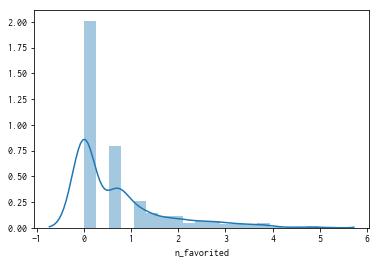

In [22]:
sns.distplot(np.log1p(datas_unique['n_favorited']))

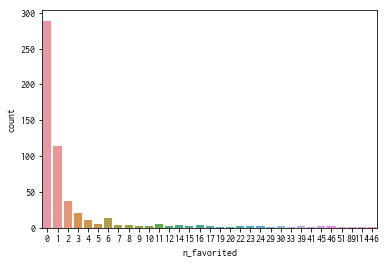

In [23]:
sns.countplot(datas_unique['n_favorited'])

In [24]:
datas_unique.sort_values(by='n_favorited', ascending=False)

,time,id,name,profile,n_following,n_followed,n_tweets,adress,n_favorited,text,n_keyword_tweets
334,Tue Jul 03 13:51:49 +0000 2018,gifu_location,岐阜県フィルムコミッション「青い、岐阜」,「青い、岐阜」公式Twitterアカウントです。岐阜県の東美濃は18年4月から放送開始のＮＨ...,15,382,81,岐阜県,146,恵那市です！連続テレビ小説「半分、青い。」の舞台地の一つである、恵那市岩村町を歩いて巡る岩村...,1
187,Thu Jul 05 10:17:41 +0000 2018,takenakasports,野球専門店 竹中スポーツ 岐阜【公式】,創業50年以上！【野球に詳しくなれて上達するお店】野球専門店 信頼の竹中スポーツです！様々な...,5988,7272,2764,岐阜 岐阜市,114,高校野球2018\n夏の甲子園へ❗️\nチーム紹介【8】【9】\n\n帝京大可児\n飛騨神岡...,1
242,Wed Jul 04 22:45:59 +0000 2018,hattori0224,ゆ き,岐阜城北 ▶︎ 中部学院 ▶︎ 保育士 / カ メ ラ / 高校.大学野球 / NSW会員❥...,741,2057,939,NaN,89,✩今朝の岐阜新聞より✩\n\n100th 夏の甲子園へ チーム紹介❾\n\n瑞浪、中京院中京...,1
256,Wed Jul 04 16:59:44 +0000 2018,Msir_35121,あみか,岐阜🇯🇵｜泉▶︎▷▶︎土岐商②｜バレー*結*,3557,4623,7933,NaN,51,瑞浪、恵那、中津は警報出てるのに土岐出てないよ。あれ。,1
416,Mon Jul 02 02:26:07 +0000 2018,SatoChiaki,佐藤千晶,生まれも育ちも気仙沼🐟仙台と名古屋のテレビ局アナウンサーを経て、東京へ。 食べ物全般すき。友...,629,6688,10551,NaN,46,毎年取材した恵那のくりきんとん！！大好き。岐阜の郡上八幡の川の透明度高さも忘れられません。各...,1
37,Fri Jul 06 13:40:41 +0000 2018,kesamaruyusuke,袈裟丸祐介@8/25 6周年単独コンサート,岐阜県飛騨市出身、鍵盤弾き語り奇行師 2018/08/25ソロ6周年単独コンサート開催！【O...,976,2100,18321,名古屋,46,連日の雨で大変な中ですが、明日の恵那ライブは予定通り行われます！そして定員数に達しましたので...,1
203,Thu Jul 05 08:34:29 +0000 2018,jtachubu,日本観光振興協会中部支部,日本観光振興協会中部支部がお届けする、富山・石川・福井・岐阜・愛知の旅情報です。,110,768,1668,NaN,45,NHK「半分、青い。」のロケ地となった岐阜県恵那市岩村町の散策マップができたそうです♪\nド...,1
61,Fri Jul 06 09:01:23 +0000 2018,velopscom,VeLops@岐阜県恵那市のVapeShop,Vape Shop VeLops 岐阜県恵那市の電子タバコVAPEの専門店 便利に使えるマ...,197,184,488,岐阜県恵那市長島町正家1-1-25 ナカヤマビル 2階E号室,45,Vape Shop VeLops\n明日7月7日(土) 13時～19時 \n岐阜県恵那市にオ...,4
521,Sun Jul 01 00:44:01 +0000 2018,hanbun_aoi,朝ドラ「半分、青い。」を応援しよう！,NHK連続テレビ小説「半分、青い。」を応援しています。ドラマのロケ地になった岐阜県東濃地方の...,255,3840,677,岐阜 恵那市,41,“朝ドラ”好きの世界的写真家レスリー・キー、「半分、青い。」に託す『日本人へのメッセージ』（...,1
48,Fri Jul 06 11:46:24 +0000 2018,gakugakuyo9,たか。,ラーメン食べ歩きしてます！特に名古屋、岐阜、長野近辺で行動してます☆カップラーメンも大好きな...,483,394,1453,NaN,39,花道@恵那\n恵那店限定「海老と貝柱の冷製タルタルまぜそば」タルタルっていうからちょっとくど...,2


# キーワードと共にツイートされることが多かった単語

In [25]:
import MeCab
import re

m = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd/")
word_list = []
for i in range(datas.shape[0]):
    if type(datas.text[i]) == str:
        texts = m.parse(datas['text'][i])
        texts = texts.split('\n')
        for text in texts:
            text = re.split('[\t,]', text)
            if text[0] == 'EOS' or text[0] == '':
                pass
            elif text[1] == '名詞' and text[2] == '一般': 
                word_list.append(text[0])
            elif text[1] == '名詞' and text[2] == 'サ変接続': 
                word_list.append(text[0])
            elif text[1] == '名詞' and text[2] == '形容動詞語幹': 
                word_list.append(text[0])
            elif text[1] == '形容詞' and text[2] == '自立': 
                word_list.append(text[0])

In [26]:
from collections import Counter

counter = Counter(word_list)
for word, cnt in counter.most_common():
    print(word, cnt)

in 38
雨 37
マップ 26
情報 25
ない 23
青い 23
散策 22
ー 21
えな 21
方面 20
大雨 19
警報 19
店 18
☔ 17
地域 15
人 14
大丈夫 13
北 13
観光 13
朝ドラ 12
なく 12
ﾉ 12
作製 12
紹介 11
仕事 11
💗 11
夏 10
鉄道 10
いい 10
大好き 10
ぜん 9
最高 9
地元 9
場所 9
避難 9
写真 9
通販 9
あと 9
お願い 9
ふくろう 9
歌 8
ふぁーむ 8
予定 8
農 8
野菜 8
カフェ 8
気 8
終了 8
オープン 8
発令 8
案内 8
話 8
休校 8
解除 7
多い 7
道 7
通行止め 7
好き 7
栗 7
美味しい 7
城主 7
予約 7
舞台 7
高校 7
普通 7
おはよう 7
注意 7
秘密 7
生徒 7
旅 7
ドライブ 7
七夕 6
💕 6
被害 6
なう 6
なし 6
事故 6
発生 6
☺ 6
次 6
状態 6
心配 6
ランチ 6
是非 6
遊び 6
💦 6
お気 6
料理 6
移動 6
来店 6
車 6
庭 6
規制 6
付近 6
本気 6
直営 6
鉄板 6
贈答 6
ハム 6
ソーセージ 6
プレミア 6
完全 6
名前 6
地区 6
メディア 6
山 6
ご飯 6
清純 6
親 6
ハメハメ 6
活 6
投稿 6
暑い 6
大会 6
ﾟ 6
配布 6
イベント 5
素敵 5
良い 5
宿 5
東 5
開始 5
家 5
皆さん 5
女 5
限定 5
早く 5
RT 5
土 5
工房 5
開催 5
列車 5
出て 5
グルメ 5
感じ 5
にんにく 5
ホームページ 5
美容 5
Ｗｅｂ 5
文庫 5
トンネル 5
交差点 5
形 5
辺り 5
全域 5
世帯 5
😋 5
かわいい 5
チーム 5
リン 5
ドラマ 5
邪魔 5
可愛い 5
😅 5
空 5
風景 5
スカイ 5
ランタン 5
車両 5
ちゃん 5
タイム 5
作品 4
大変 4
鶏 4
本 4
先生 4
有名 4
運転 4
休み 4
桃 4
紫陽花 4
気遣い 4
無い 4
駅 4
人気 4
発表 4
予想 4
元気 4
ひがし 4
センター 4
結婚 4
作業 4
バス 4
電車 4
車線 4
到着 4
ええ 4
先 4
皆様 4
路面 4
段

あんかけ 1
有休 1
長男 1
坊 1
eHg 1
お誘い 1
宝島 1
閉店 1
悲しかっ 1
水着 1
時給 1
最大 1
手渡し 1
条件 1
顔出し 1
初心者 1
歓迎 1
気軽 1
お小遣い稼ぎ 1
たい人 1
気楽 1
優しく 1
涙 1
スピード 1
上 1
⚽ 1
nxlzA 1
代行 1
ぢ 1
ぃ 1
〰 1
下車 1
BBzcl 1
ハーフタイム 1
😵 1
眠 1
気狂い 1
やから 1
授乳 1
ストーリー 1
季節 1
震源 1
発作 1
苦しみ 1
沈黙 1
平静 1
しんど 1
原作 1
回 1
Chat 1
Base 1
運営 1
理想郷 1
場 1
青二才 1
Kimono 1
復帰 1
五線譜 1
音符 1
た人 1
アナウンサー 1
恐縮 1
録画 1
菜箸 1
クレーム 1
げんき 1
ぜんぜん 1
ソロキャン 1
キャンプ 1
一人 1
楽しいっ 1
😣 1
文章 1
日付 1
ょたてい 1
集合 1
カバン 1
ヒミツ 1
美味く 1
ポイント 1
王子 1
実父 1
markXgirl 1
卍 1
こーー 1
gPQ 1
pSYBG 1
PROMOTION 1
改め 1
スター 1
シード 1
Stage 1
Performance 1
魂 1
スタントマン 1
物語 1
上演 1
決定 1
ワールド 1
再来 1
株式会社 1
利益 1
入荷 1
さい子 1
ダメ 1
飼育 1
簡単 1
owu 1
珠玉 1
茶色い 1
わらじ 1
主流 1
型 1
友人 1
庭先 1
炭火 1
おみやげ 1
エンディング 1
城下町 1
町並み 1
からか 1
飾りつけ 1
味わい 1
アーチ 1
門 1
RCfAk 1
LvpE 1
エルクアトロギャッツ 1
UKbjI 1
あん 1
好評 1
山道 1
刃物 1
身柄 1
確保 1
協力 1
コボスタ 1
くり 1
キムチ 1
プライベート 1
S 1
名産 1
いがぐり 1
💭 1
病院 1
丘 1
ホピ 1
ガーデン 1
ハンモック 1
We 1
げつよ 1
びです 1
精神 1
湯気 1
吸引 1
連想 1
gFi 1
塩尻 1
線形 1
大きい 1
IbMQdVo 1
うらやましい 1
涼しく 1
♨ 1
MNZHXSAt 1
パーソナリティ 1
制覇 1
kHz 

In [27]:
stop_words = ['in', 'ー', 'bot', 'ない', '無い', 'えな']

def remove_specified_values(arr, value):
    while value in arr:
        arr.remove(value)

for word in stop_words:
    remove_specified_values(word_list, word)

In [28]:
counter = Counter(word_list)
for word, cnt in counter.most_common():
    print(word, cnt)

雨 37
マップ 26
情報 25
青い 23
散策 22
方面 20
大雨 19
警報 19
店 18
☔ 17
地域 15
人 14
大丈夫 13
北 13
観光 13
朝ドラ 12
なく 12
ﾉ 12
作製 12
紹介 11
仕事 11
💗 11
夏 10
鉄道 10
いい 10
大好き 10
ぜん 9
最高 9
地元 9
場所 9
避難 9
写真 9
通販 9
あと 9
お願い 9
ふくろう 9
歌 8
ふぁーむ 8
予定 8
農 8
野菜 8
カフェ 8
気 8
終了 8
オープン 8
発令 8
案内 8
話 8
休校 8
解除 7
多い 7
道 7
通行止め 7
好き 7
栗 7
美味しい 7
城主 7
予約 7
舞台 7
高校 7
普通 7
おはよう 7
注意 7
秘密 7
生徒 7
旅 7
ドライブ 7
七夕 6
💕 6
被害 6
なう 6
なし 6
事故 6
発生 6
☺ 6
次 6
状態 6
心配 6
ランチ 6
是非 6
遊び 6
💦 6
お気 6
料理 6
移動 6
来店 6
車 6
庭 6
規制 6
付近 6
本気 6
直営 6
鉄板 6
贈答 6
ハム 6
ソーセージ 6
プレミア 6
完全 6
名前 6
地区 6
メディア 6
山 6
ご飯 6
清純 6
親 6
ハメハメ 6
活 6
投稿 6
暑い 6
大会 6
ﾟ 6
配布 6
イベント 5
素敵 5
良い 5
宿 5
東 5
開始 5
家 5
皆さん 5
女 5
限定 5
早く 5
RT 5
土 5
工房 5
開催 5
列車 5
出て 5
グルメ 5
感じ 5
にんにく 5
ホームページ 5
美容 5
Ｗｅｂ 5
文庫 5
トンネル 5
交差点 5
形 5
辺り 5
全域 5
世帯 5
😋 5
かわいい 5
チーム 5
リン 5
ドラマ 5
邪魔 5
可愛い 5
😅 5
空 5
風景 5
スカイ 5
ランタン 5
車両 5
ちゃん 5
タイム 5
作品 4
大変 4
鶏 4
本 4
先生 4
有名 4
運転 4
休み 4
桃 4
紫陽花 4
気遣い 4
駅 4
人気 4
発表 4
予想 4
元気 4
ひがし 4
センター 4
結婚 4
作業 4
バス 4
電車 4
車線 4
到着 4
ええ 4
先 4
皆様 4
路面 4
段差 4
道路 4
完成 4
ソフト 4
取材 4
お待ち

ストーリー 1
季節 1
震源 1
発作 1
苦しみ 1
沈黙 1
平静 1
しんど 1
原作 1
回 1
Chat 1
Base 1
運営 1
理想郷 1
場 1
青二才 1
Kimono 1
復帰 1
五線譜 1
音符 1
た人 1
アナウンサー 1
恐縮 1
録画 1
菜箸 1
クレーム 1
げんき 1
ぜんぜん 1
ソロキャン 1
キャンプ 1
一人 1
楽しいっ 1
😣 1
文章 1
日付 1
ょたてい 1
集合 1
カバン 1
ヒミツ 1
美味く 1
ポイント 1
王子 1
実父 1
markXgirl 1
卍 1
こーー 1
gPQ 1
pSYBG 1
PROMOTION 1
改め 1
スター 1
シード 1
Stage 1
Performance 1
魂 1
スタントマン 1
物語 1
上演 1
決定 1
ワールド 1
再来 1
株式会社 1
利益 1
入荷 1
さい子 1
ダメ 1
飼育 1
簡単 1
owu 1
珠玉 1
茶色い 1
わらじ 1
主流 1
型 1
友人 1
庭先 1
炭火 1
おみやげ 1
エンディング 1
城下町 1
町並み 1
からか 1
飾りつけ 1
味わい 1
アーチ 1
門 1
RCfAk 1
LvpE 1
エルクアトロギャッツ 1
UKbjI 1
あん 1
好評 1
山道 1
刃物 1
身柄 1
確保 1
協力 1
コボスタ 1
くり 1
キムチ 1
プライベート 1
S 1
名産 1
いがぐり 1
💭 1
病院 1
丘 1
ホピ 1
ガーデン 1
ハンモック 1
We 1
げつよ 1
びです 1
精神 1
湯気 1
吸引 1
連想 1
gFi 1
塩尻 1
線形 1
大きい 1
IbMQdVo 1
うらやましい 1
涼しく 1
♨ 1
MNZHXSAt 1
パーソナリティ 1
制覇 1
kHz 1
I 1
近郊 1
タカ 1
ツナ 1
武将 1
参照 1
姓 1
改姓 1
生誕 1
スマート 1
性格 1
クール 1
美少女 1
未来 1
幸 1
多かれ 1
bX 1
タイテ 1
かんし 1
ルーツ 1
oBoF 1
コブラ 1
片足 1
豆 1
まめ 1
コラボキャス 1
缶 1
事前 1
プレゼン 1
EXsPd 1
エッチ 1
インパクト 1
女優 1
卒業 1
大切 1
ロングラン 1
連隊 1
系列 1
記

In [29]:
word_list = ' '.join(word_list)

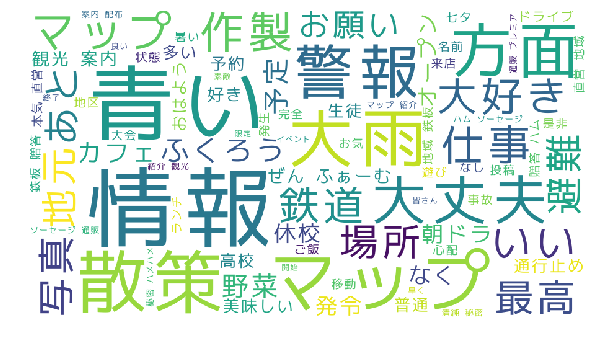

In [30]:
from wordcloud import WordCloud

fpath = "~/Library/Fonts/RictyDiminished-Regular.ttf"

wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, max_words=80).generate(word_list)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(outfile)
plt.show()
#一文字の単語は表示してくれない...